# HW 4 Numerical linear algebra ( 50 pts)


## Please restart the kernel and run all before you submit !


## Your Name: Amay Jain

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

# Part 1: PCA (25 pts)

In this part, we will use PCA on some real dataset. 

Reuqirements:
1. You should write your own code. You are not allowed to use `sklear.decomposition.PCA` command. (5 pts)

2. Your solution should contain two functions. Function 1 takes data matrix X and integer k as inputs, and returns first k principal components. Function 2 takes data matrix X as input and a threshold $0\leq\eta\leq1$ as inputs, and returns an integer k such that the first $k$ principal components (smallest) has explained variance ratio more than $\eta$. **Your function should work for any data matrix X. In other words, you cannot use any global variable in your function.** (10 pts)

3. Visualize your new datasets in 2D and state your observations. (3 pts)

4. Report the smallest number of principal components required to explain 80% variance ratio for both datasets. (2 pts)

5. Function docstrings are required. You should also use inline comments and markdown to explain your code and make conclusions. (5 pts)

Hints:
1. You can assume that each row in $X$ represents a data.
2. Sample codes in lecture notes are helpful.

Datasets:
1. diabetes dataset: url = "https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/03_Numerical_Linear_Algebra/diabetes.csv"
2. swiss roll dataset: url = "https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/03_Numerical_Linear_Algebra/swiss.csv"

In [2]:
diab_url = "https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/03_Numerical_Linear_Algebra/diabetes.csv"
swiss_url = "https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/03_Numerical_Linear_Algebra/swiss.csv"

diab = pd.read_csv(diab_url)
swiss = pd.read_csv(swiss_url)

# diab_data = diab.drop('Outcome', axis = 1)
# diab_target = diab[['Outcome']]

# swiss_data = swiss.drop('label', axis = 1)
# swiss_target = swiss[['label']]

In [3]:
# your solution here
def first_k_components(X, k):

    # select all columns except last column (target)
    X = X.iloc[:, :-1]

    # standardize all the columns
    X_standard = (X - np.mean(X, axis = 0)) / np.std(X, axis = 0)

    # extract SVD components of standardized data
    U, S, V = np.linalg.svd(X_standard)

    # perform PCA 
    X_pca = X_standard @ V.T

    # return first k components
    return X_pca.iloc[:, :k]


def min_k_components(X, threshold):

    # find all PCA components
    X_pca = first_k_components(X, X.shape[1] - 1)

    # calculate how much variance is accounted by each component
    variances = np.var(X_pca, axis = 0)

    # calculate the percentage of total variation each component accounts for
    variance_ratios = variances / np.sum(variances)

    # find the total percentage of variation all the components account for once an additional component is added
    total_variance_ratio = np.cumsum(variance_ratios)

    # check when an additional component accounts for the total percentage of variation being above the threshold
    threshold_check = total_variance_ratio >= threshold

    # return index position + 1 of that additional component crossing the threshold
    return threshold_check.idxmax() + 1

In [4]:
thresh = 0.8

min_k_components(diab, thresh)

5

In [5]:
test = first_k_components(diab, 10)

test

,0,1,2,3,4,5,6,7
0,-1.068503,1.234895,0.095930,0.496990,-0.109985,0.357183,-0.858821,0.974304
1,1.121683,-0.733852,-0.712938,0.285056,-0.389507,-0.406329,-0.757034,0.354215
2,0.396477,1.595876,1.760678,-0.070395,0.906474,-0.040018,1.152990,1.068528
3,1.115781,-1.271241,-0.663729,-0.579123,-0.356060,-0.412520,0.029247,-0.130648
4,-2.359334,-2.184819,2.963107,4.033099,0.592684,1.078341,-0.549358,-0.319352
...,...,...,...,...,...,...,...,...
763,-1.562085,1.923150,-0.867408,-0.390926,-2.541527,-0.077322,-1.141357,-0.138590
764,0.100405,-0.614181,-0.764353,-0.134859,0.499290,0.529339,-0.152109,0.467532
765,0.283475,0.097065,-0.077192,-0.687561,-0.523009,-0.538270,0.335563,0.289439
766,1.060324,0.837062,0.425030,-0.204493,0.957593,0.153307,-1.180308,-0.534344


# Part 2: Least square (25 pts)

Consider the following least-square problem

$$ \mathop{ \mathrm{min} }_x \|Ax-b\|_2^2, $$

the solution can be written as a nice formula $x=(A^TA)^{-1}A^Tb$, which comes from normal equation $A^TAx = A^Tb$.


In this part, we want to compare the computational times of using matrix inverse and solve command.

Step 1: Write a function to generate matrix $A$ with m rows and N columns, and observation vector $b$ with m rows 1 column. Both matrix $A$ and vector $b$ are randomly generated by using `np.random`. The distribution of $A$ or $b$ can be either standard gaussian (`np.random.randn`) or uniform (`np.random.rand`). In other words, your function should allow four different choices, which are 1. gaussian $A$ and gaussian $b$, 2. gaussian $A$ and uniform $b$, 3. uniform $A$ and gaussian $b$, and 4. uniform $A$ and uniform $b$. (5 pts)

Step 2: Use function written in step 1 to generate $A$ and $b$ with fixed number of rows $m=10000$ and varied number of columns $N=[1000,2000,4000,8000,16000]$ (You can determine the distribution you want to use). Then, use matrix inverse and solve command to solve least square problem with $A$ and $b$. (5 pts)

Step 3: Visualization and conclusion. The first plot is computation time (y-axis) vs N (x-axis) for inverse matrix method and solve command method. The second plot is plotting log(time) (y-axis) vs log(N) (x-axis). You should add legends, titles, xlabels, ylabels and etc to make your plot clear. What is your conclusion? (10 pts, 5 pts each figure)


**Requirement:**

You should write docstring for your function and inline comments for your codes. (5 pts)

In [6]:
# Your solution here.

def gen_Matrices(m, N, A_dist = 'g', b_dist = 'g'):

    if A_dist == 'g':
        A = np.random.randn(m, N)
    else:
        A = np.random.rand(m, N)

    if b_dist == 'g':
        b = np.random.randn(m, 1)
    else:
        b = np.random.rand(m, 1)

    return A, b

In [7]:
N = [1000, 2000, 4000, 8000, 16000]
# N = [1, 100, 500, 800]
comp_times_inv = []
comp_times_solve = []

for col in N:

    A, b = gen_Matrices(10000, col)

    start1 = time.time()

    np.linalg.inv(A.T @ A) @ A.T @ b

    stop1 = time.time()

    comp_times_inv.append(stop1 - start1)

    start2 = time.time()

    np.linalg.solve(A.T @ A, A.T @ b)

    stop2 = time.time()

    comp_times_solve.append(stop2 - start2)

Text(0.5, 0.98, 'Comparison of Computation times between Inverse and Solve Methods')

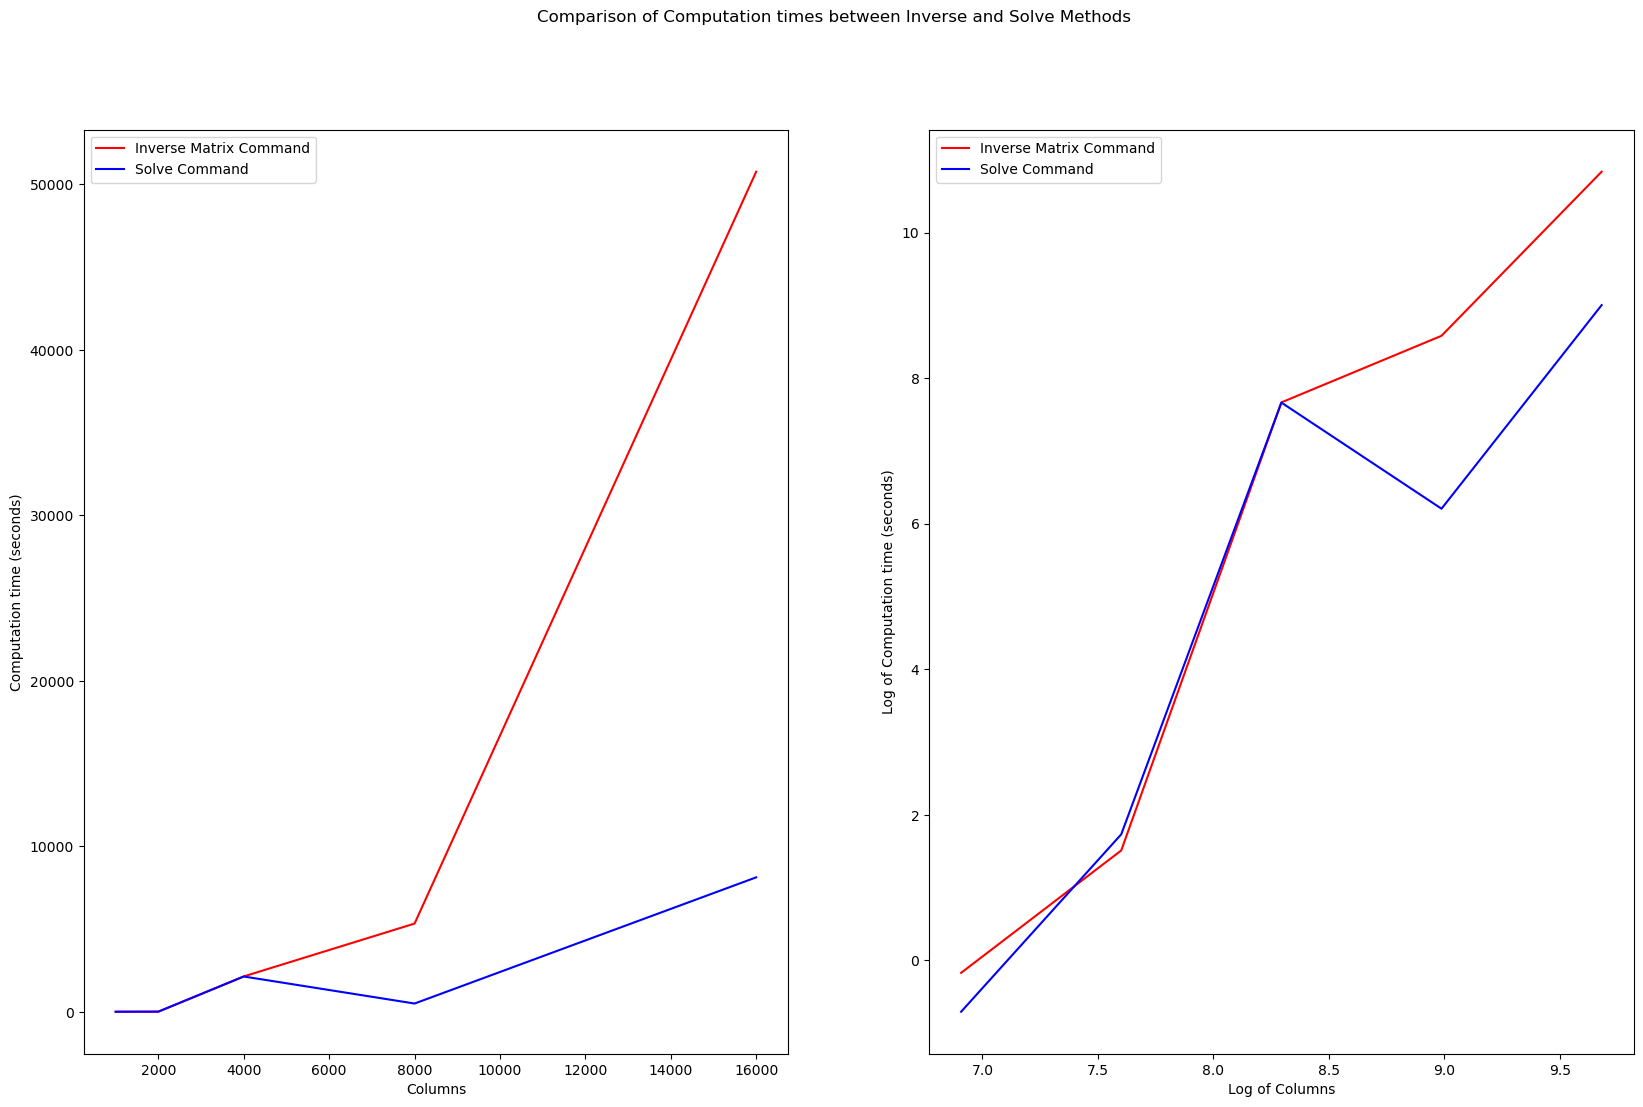

In [8]:
fig, ax = plt.subplots(1, 2, sharey = False, figsize = (20, 12))

ax[0].plot(N, comp_times_inv, color = 'r', label = 'Inverse Matrix Command')
ax[0].plot(N, comp_times_solve, color = 'b', label = 'Solve Command')
ax[0].set(xlabel = 'Columns', ylabel = 'Computation time (seconds)')
ax[0].legend()

ax[1].plot(np.log(N), np.log(comp_times_inv), color = 'r', label = 'Inverse Matrix Command')
ax[1].plot(np.log(N), np.log(comp_times_solve), color = 'b', label = 'Solve Command')
ax[1].set(xlabel = 'Log of Columns', ylabel = 'Log of Computation time (seconds)')
ax[1].legend()

fig.suptitle("Comparison of Computation times between Inverse and Solve Methods")